In [1]:
import pandas as pd
import re

In [2]:
cases = ['genome', 'genome-48', 'genome-98', 'random']
sizes = [1, 2, 4, 8, 16 ,32]
programs = ['beetl', 'bwt-lcp-em', 'egap', 'gsa-is']

In [3]:
def get_data(dir):
    with open(dir + 'time.txt') as datafile:
        lines=datafile.readlines()
    parsed = {}
    for line in lines:
        # remove percent character
        m = re.match('^\t+(.*?):\s+(\S+?)\%?$', line)
        if m is not None:
            # transform hh:mm:ss or mm:ss into seconds
            m2 = re.match('(\d+):(\d\d):([\d\.]+)', m.group(2))
            if m2 is not None:
                parsed[m.group(1)] = float(m2.group(3)) + int(m2.group(2)) * 60 + int(m2.group(1)) * 60 * 60
            else:
                m2 = re.match('(\d+):([\d\.]+)', m.group(2))
                if m2 is not None:
                    parsed[m.group(1)] = float(m2.group(2)) + int(m2.group(1)) * 60
                else:
                    parsed[m.group(1)] = float(m.group(2))
    return parsed

In [4]:
df = pd.DataFrame()
for case in cases:
    for size in sizes:
        for program in programs:
            temp = pd.DataFrame(get_data('log/' + str(case) + '/' +  str(size) + '/' +  str(program) + '/'), 
                                index=[0])
            temp['case'] = case
            temp['size'] = size
            temp['program'] = program
            df = df.append(temp)
df.set_index(['case', 'size', 'program'], inplace = True)
df.head()

Average resident set size (kbytes)  \
case   size program                                          
genome 1    beetl                                      0.0   
            bwt-lcp-em                                 0.0   
            egap                                       0.0   
            gsa-is                                     0.0   
       2    beetl                                      0.0   

                        Average shared text size (kbytes)  \
case   size program                                         
genome 1    beetl                                     0.0   
            bwt-lcp-em                                0.0   
            egap                                      0.0   
            gsa-is                                    0.0   
       2    beetl                                     0.0   

                        Average stack size (kbytes)  \
case   size program                                   
genome 1    beetl                               0.0   
            bwt-lcp-em                          0.0   
            egap                                0.0   
            gsa-is                              0.0   
       2    beetl                               0.0   

                        Average total size (kbytes)  \
case   size program                                   
genome 1    beetl                               0.0   
            bwt-lcp-em                          0.0   
            egap                                0.0   
            gsa-is                              0.0   
       2    beetl                               0.0   

                        Average unshared data size (kbytes)  \
case   size program                                           
genome 1    beetl                                       0.0   
            bwt-lcp-em                                  0.0   
            egap                                        0.0   
            gsa-is                                      0.0   
       2    beetl                                       0.0   

                        Elapsed (wall clock) time (h:mm:ss or m:ss)  \
case   size program                                                   
genome 1    beetl                                            367.48   
            bwt-lcp-em                                       991.09   
            egap                                              48.84   
            gsa-is                                            74.86   
       2    beetl                                           1932.47   

                        Exit status  File system inputs  File system outputs  \
case   size program                                                            
genome 1    beetl               0.0            112128.0          107981320.0   
            bwt-lcp-em          0.0               128.0          208999976.0   
            egap                0.0              2192.0             291048.0   
            gsa-is              0.0               160.0            2910184.0   
       2    beetl               0.0         148251832.0          215955744.0   

                        Involuntary context switches  \
case   size program                                    
genome 1    beetl                             6264.0   
            bwt-lcp-em                      885620.0   
            egap                             11382.0   
            gsa-is                             398.0   
       2    beetl                           316399.0   

                                   ...              \
case   size program                ...               
genome 1    beetl                  ...               
            bwt-lcp-em             ...               
            egap                   ...               
            gsa-is                 ...               
       2    beetl                  ...               

                        Minor (reclaiming a frame) page faults  \
case   size program                               

# Plots

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
def show_case(field, case):
    df_plot = df[field][case].unstack('program')
    print('Dataset: ' + case + ' ' + field)
    print(df_plot)
    print("")
    df_plot.plot(figsize=(18,10), grid=True, title='Dataset: ' + case, legend = True, table = True)

Dataset: genome Elapsed (wall clock) time (h:mm:ss or m:ss)
program     beetl  bwt-lcp-em    egap  gsa-is
size                                         
1          367.48      991.09   48.84   74.86
2         1932.47     2165.02  100.76  339.71
4         4173.00     9268.00  247.66   16.03
8         7358.00    17484.00  749.33  521.85
16       15963.00    53102.00  240.33  222.06
32        1901.56    95574.00  188.55  138.28

Dataset: genome-48 Elapsed (wall clock) time (h:mm:ss or m:ss)
program    beetl  bwt-lcp-em    egap  gsa-is
size                                        
1          38.48      113.84   13.83   20.66
2          85.07      216.14   59.30   45.92
4         189.72      541.78   62.50   93.14
8         752.99      723.03  133.86  433.54
16       2320.96     6636.00  395.81   29.06
32       4722.00    14023.00   36.38   29.65

Dataset: genome-98 Elapsed (wall clock) time (h:mm:ss or m:ss)
program     beetl  bwt-lcp-em    egap   gsa-is
size                                 

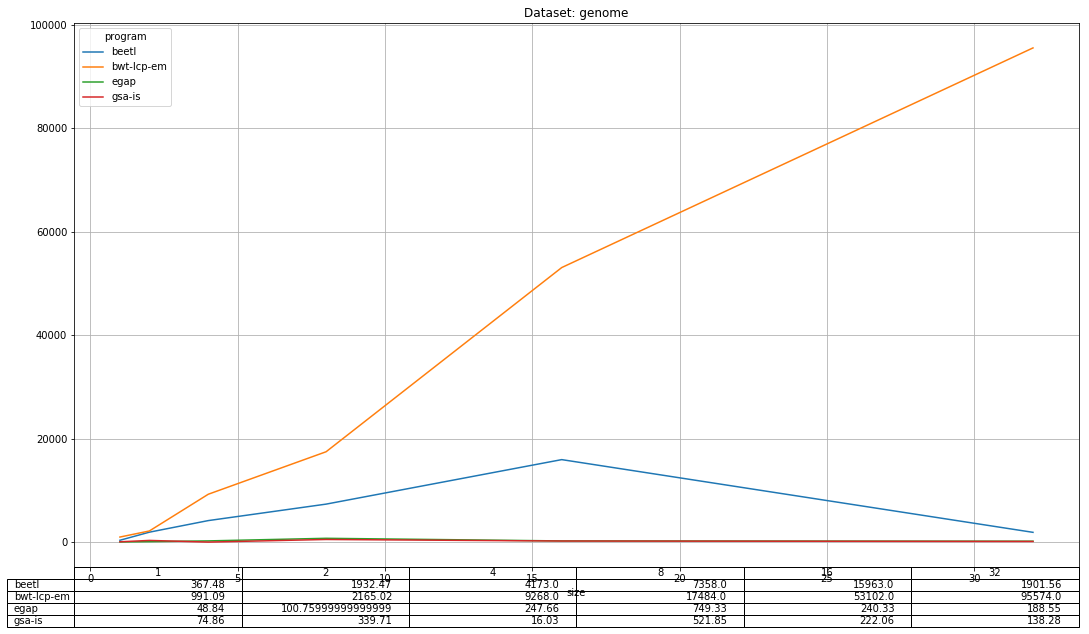

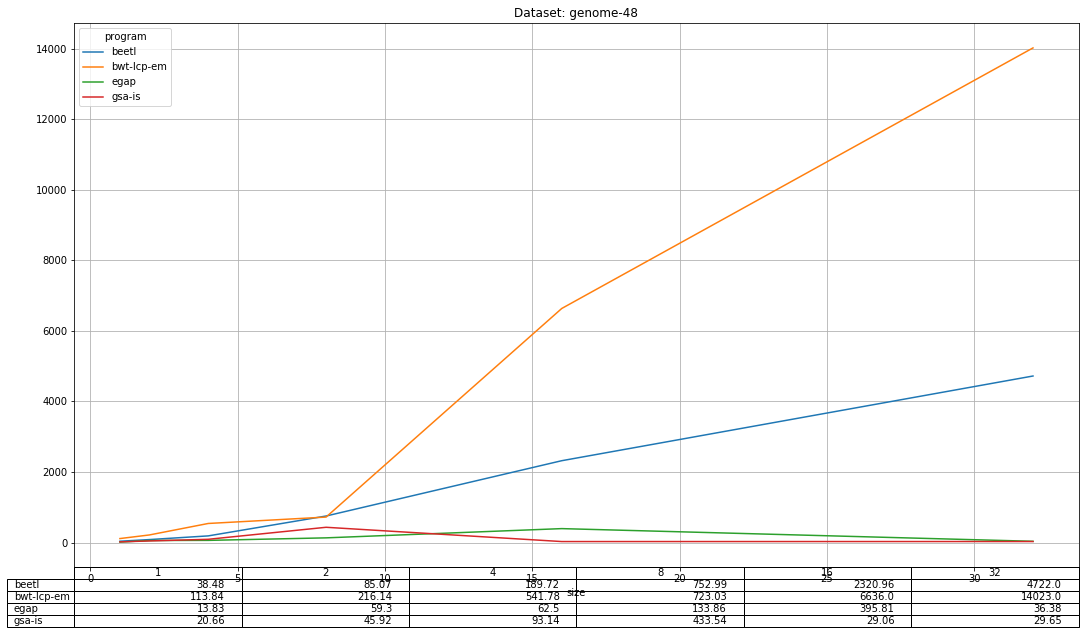

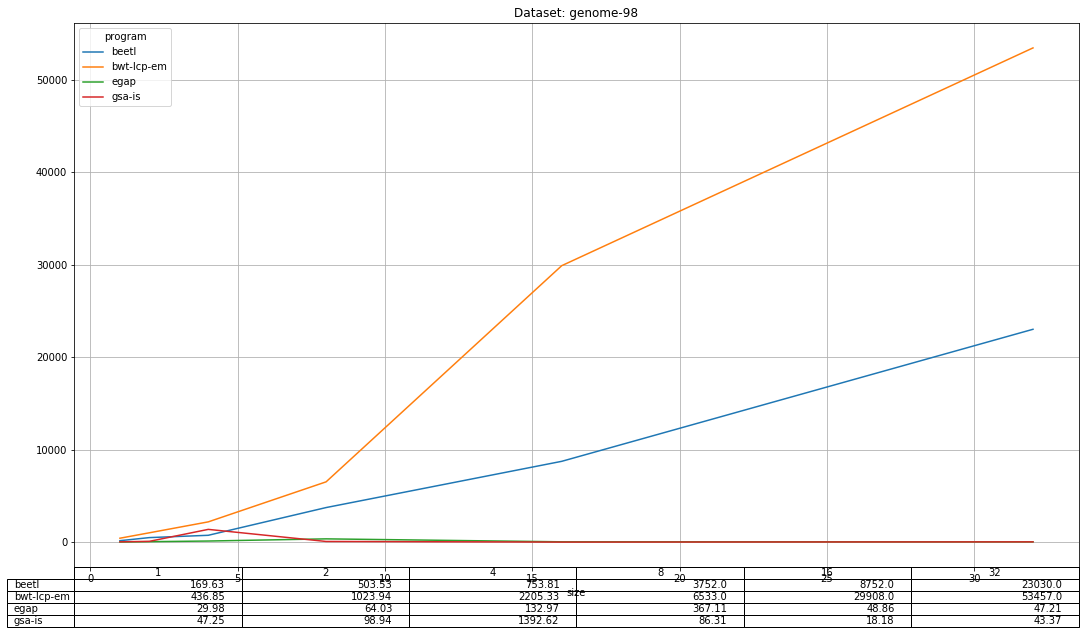

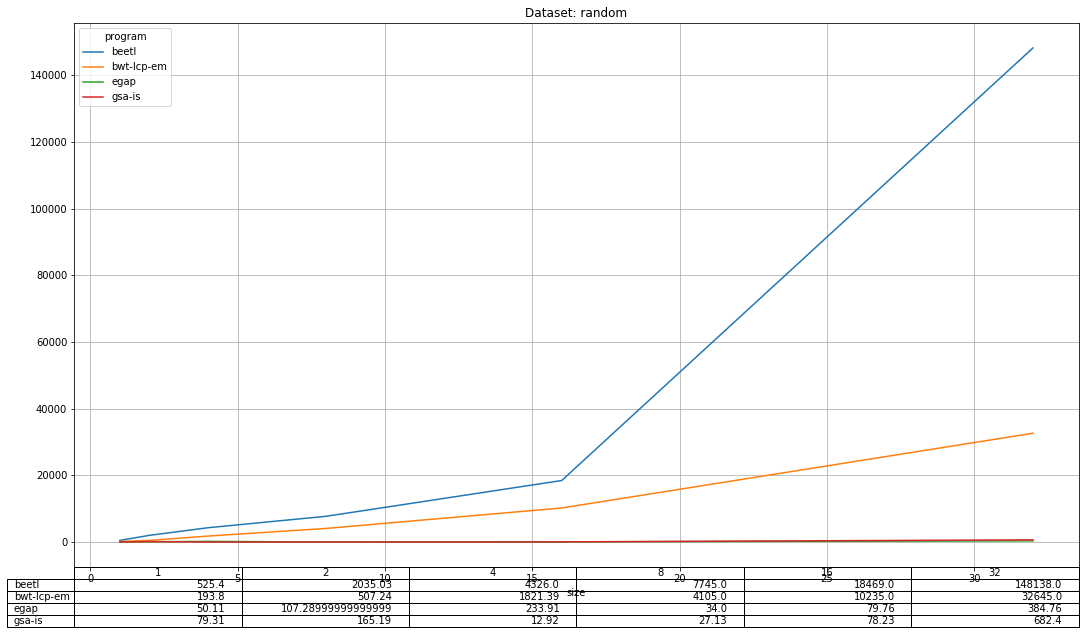

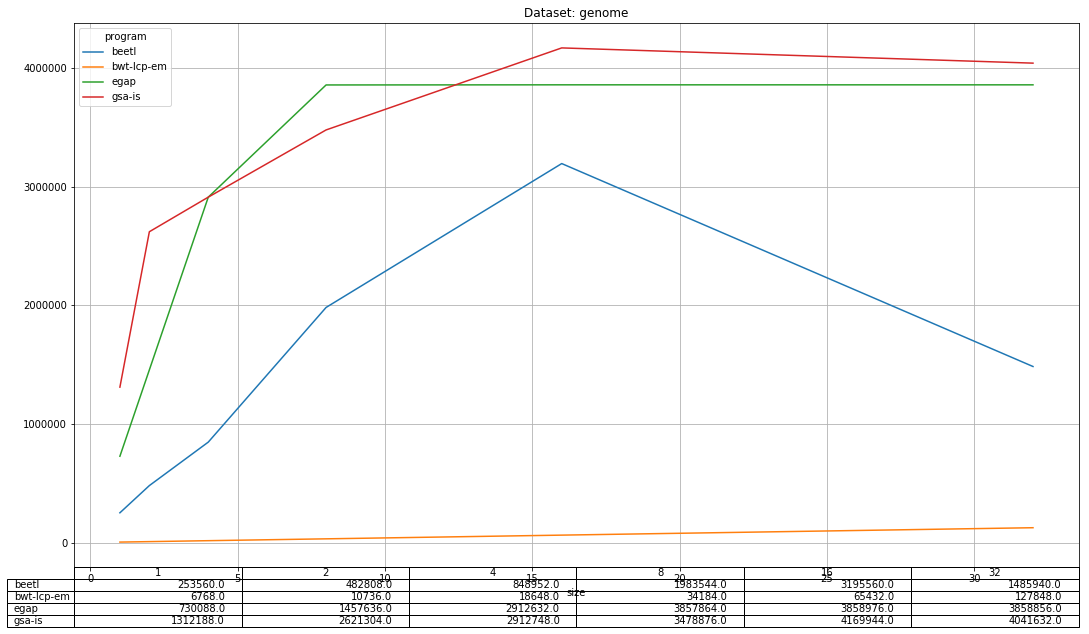

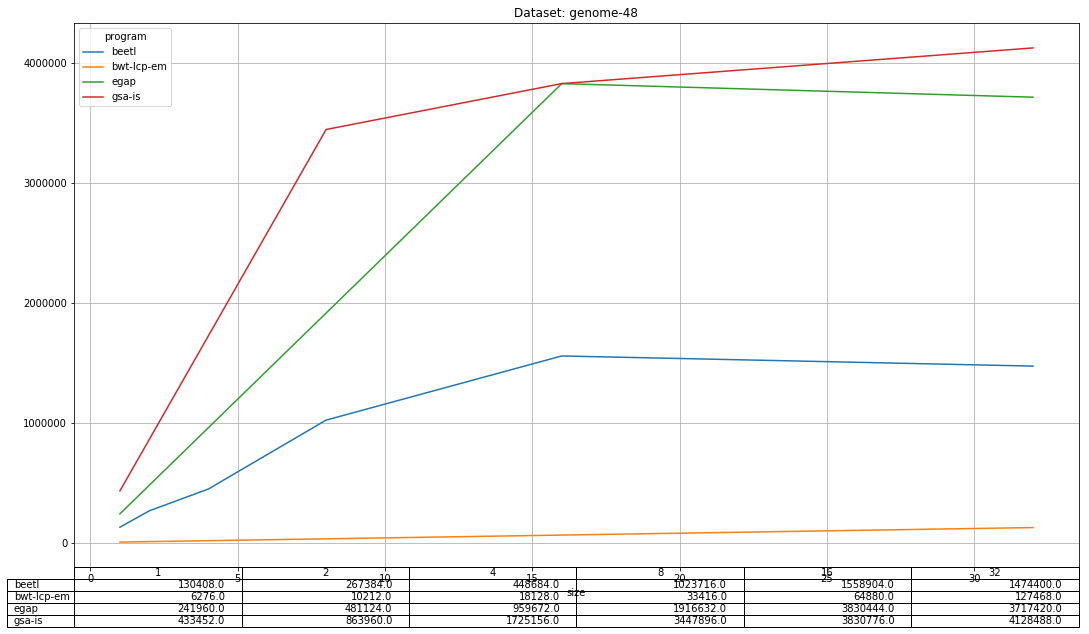

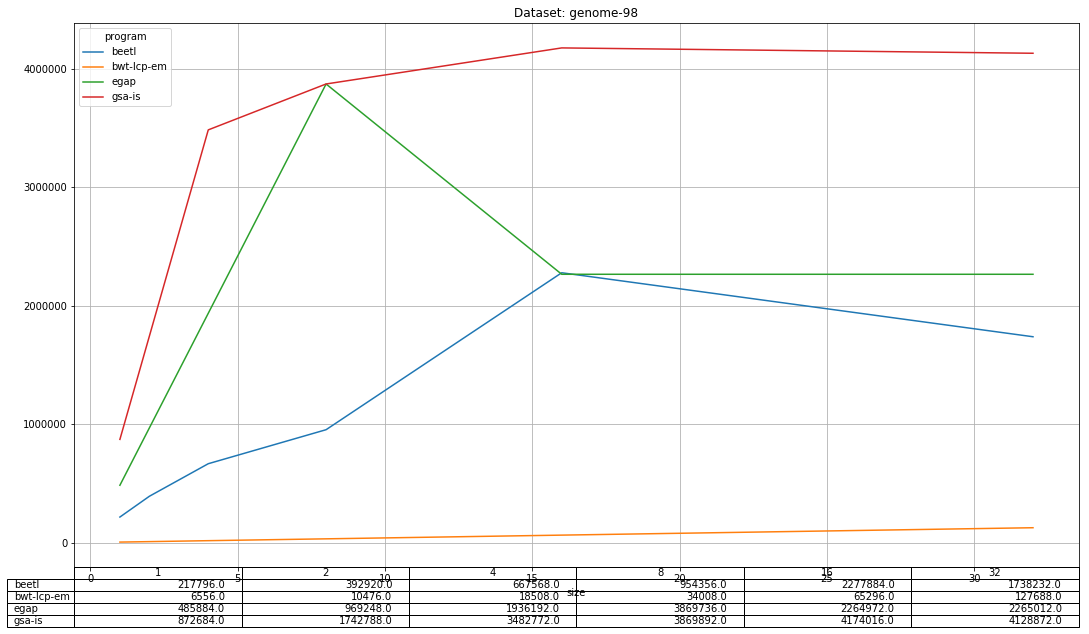

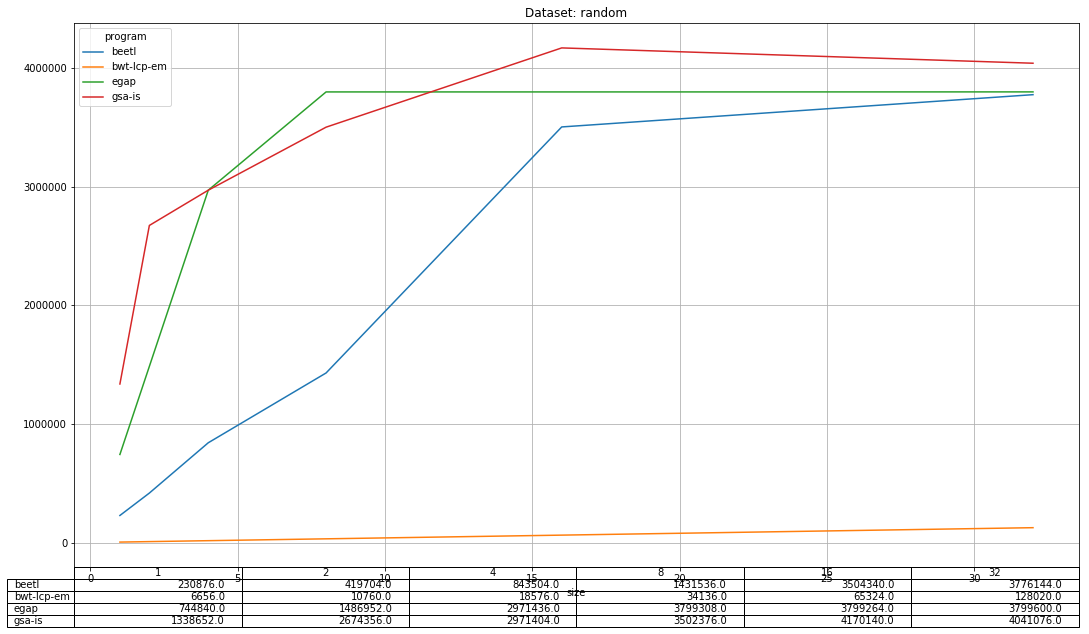

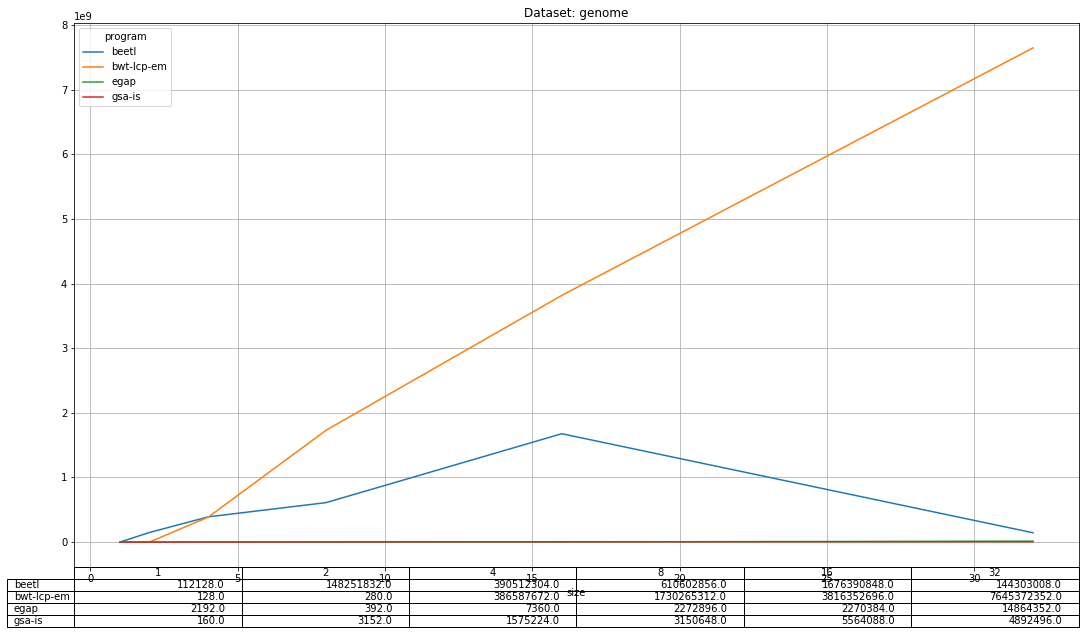

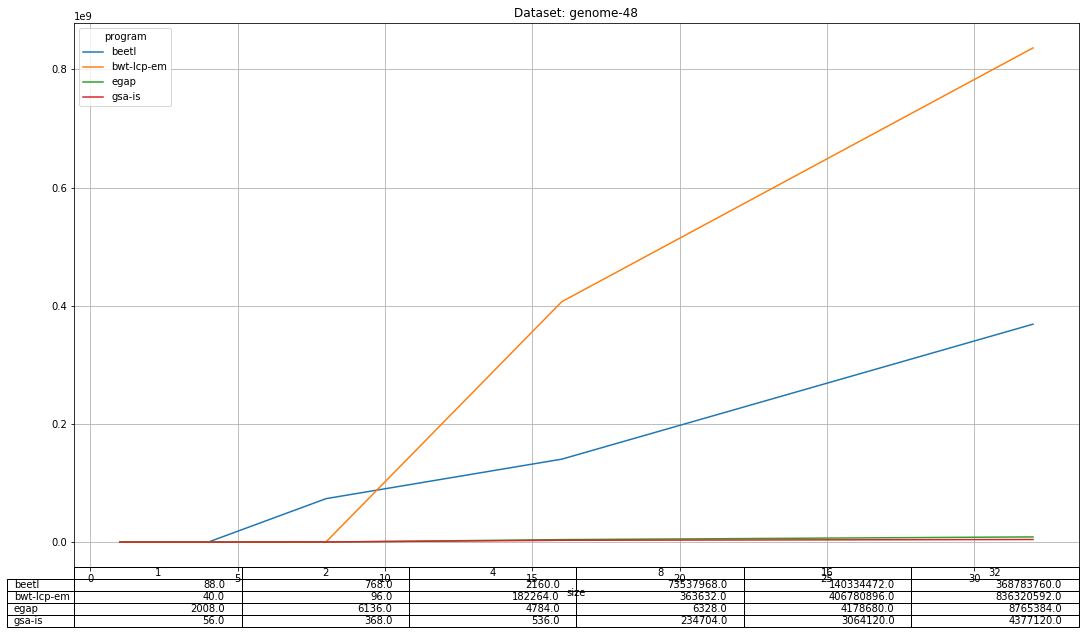

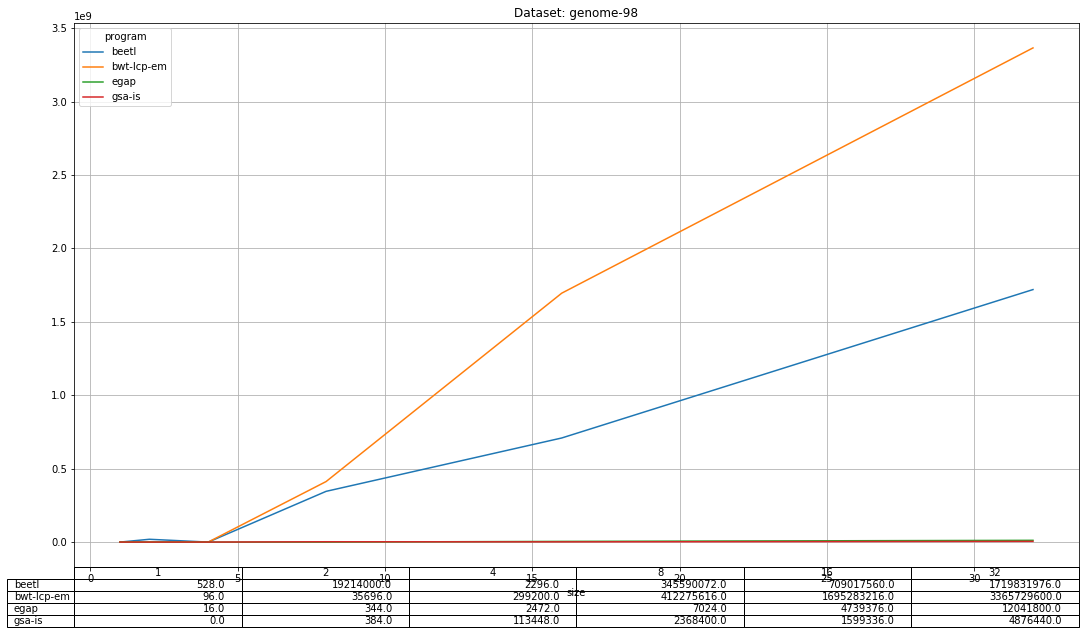

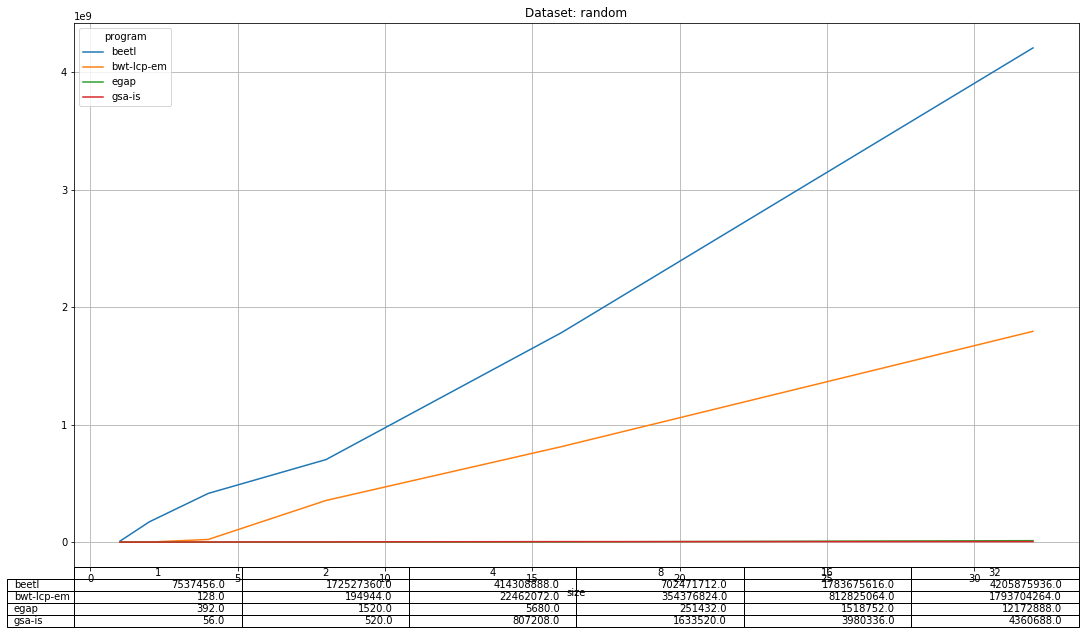

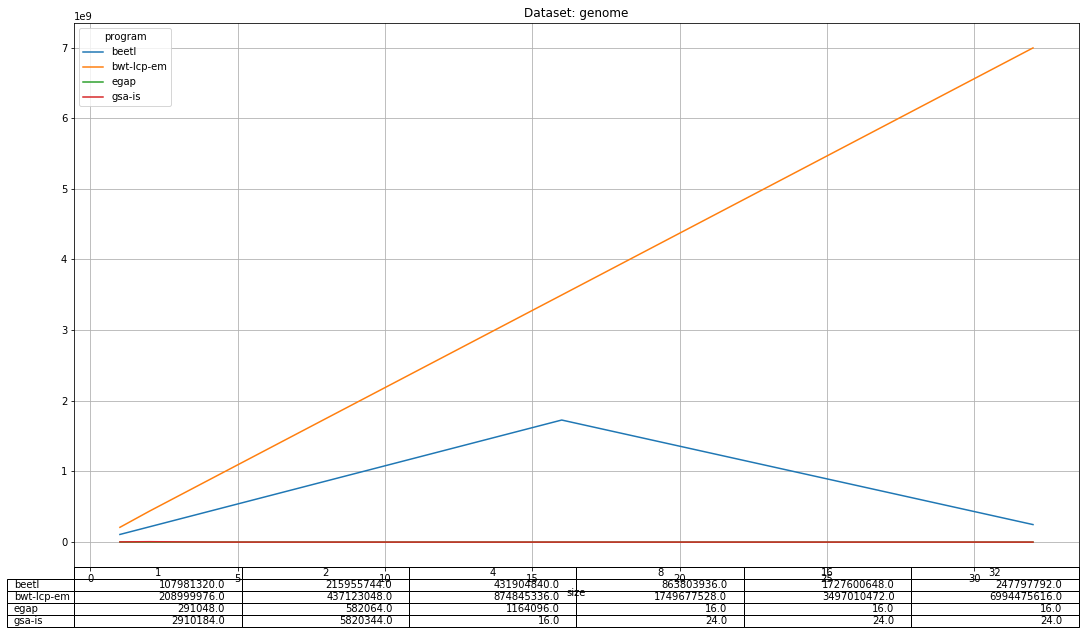

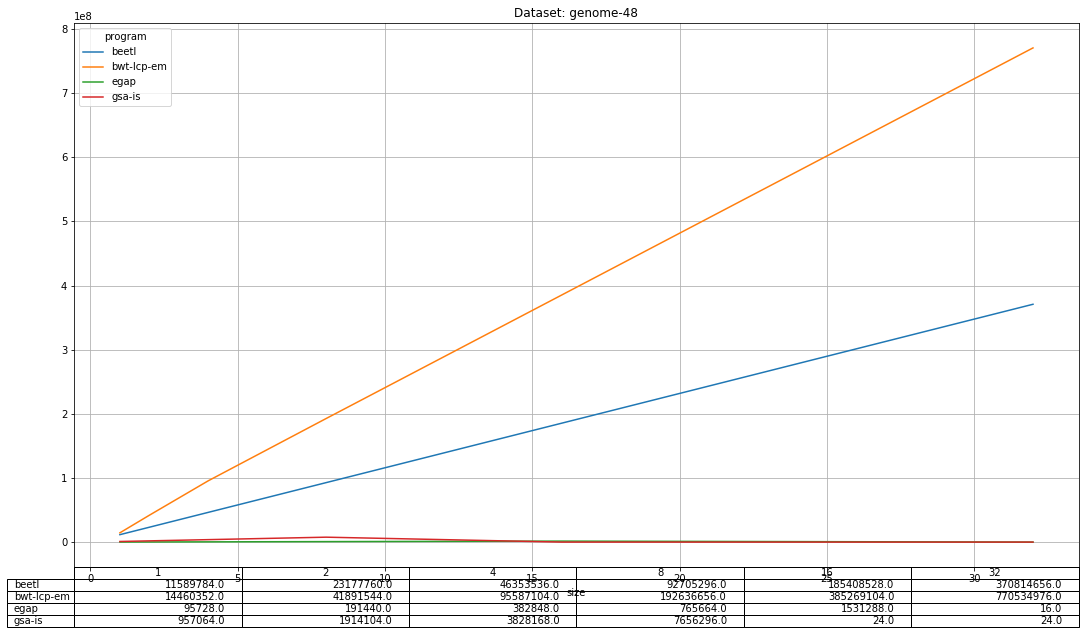

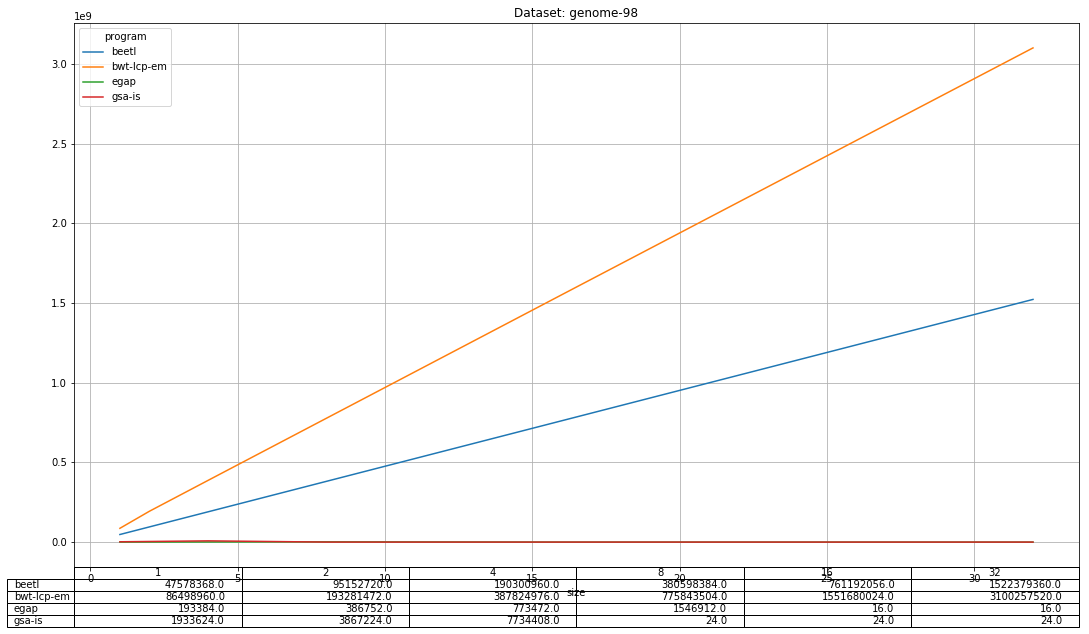

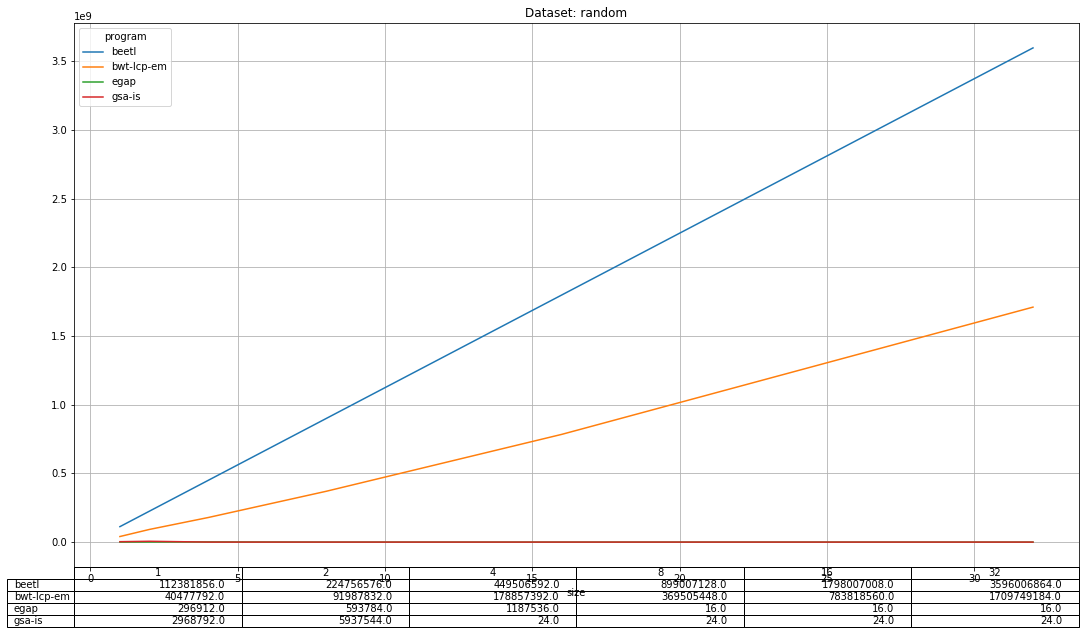

In [7]:
for field in ['Elapsed (wall clock) time (h:mm:ss or m:ss)', 'Maximum resident set size (kbytes)',
             'File system inputs', 'File system outputs']:
    for case in cases:
        show_case(field, case)